<a href="https://colab.research.google.com/github/seque1204/EduceLab/blob/main/ImageSplit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install numpy pillow h5py

# Generates a 16 channel image, then finds a RANDOM subarea of that image and visualizes each channel separately.

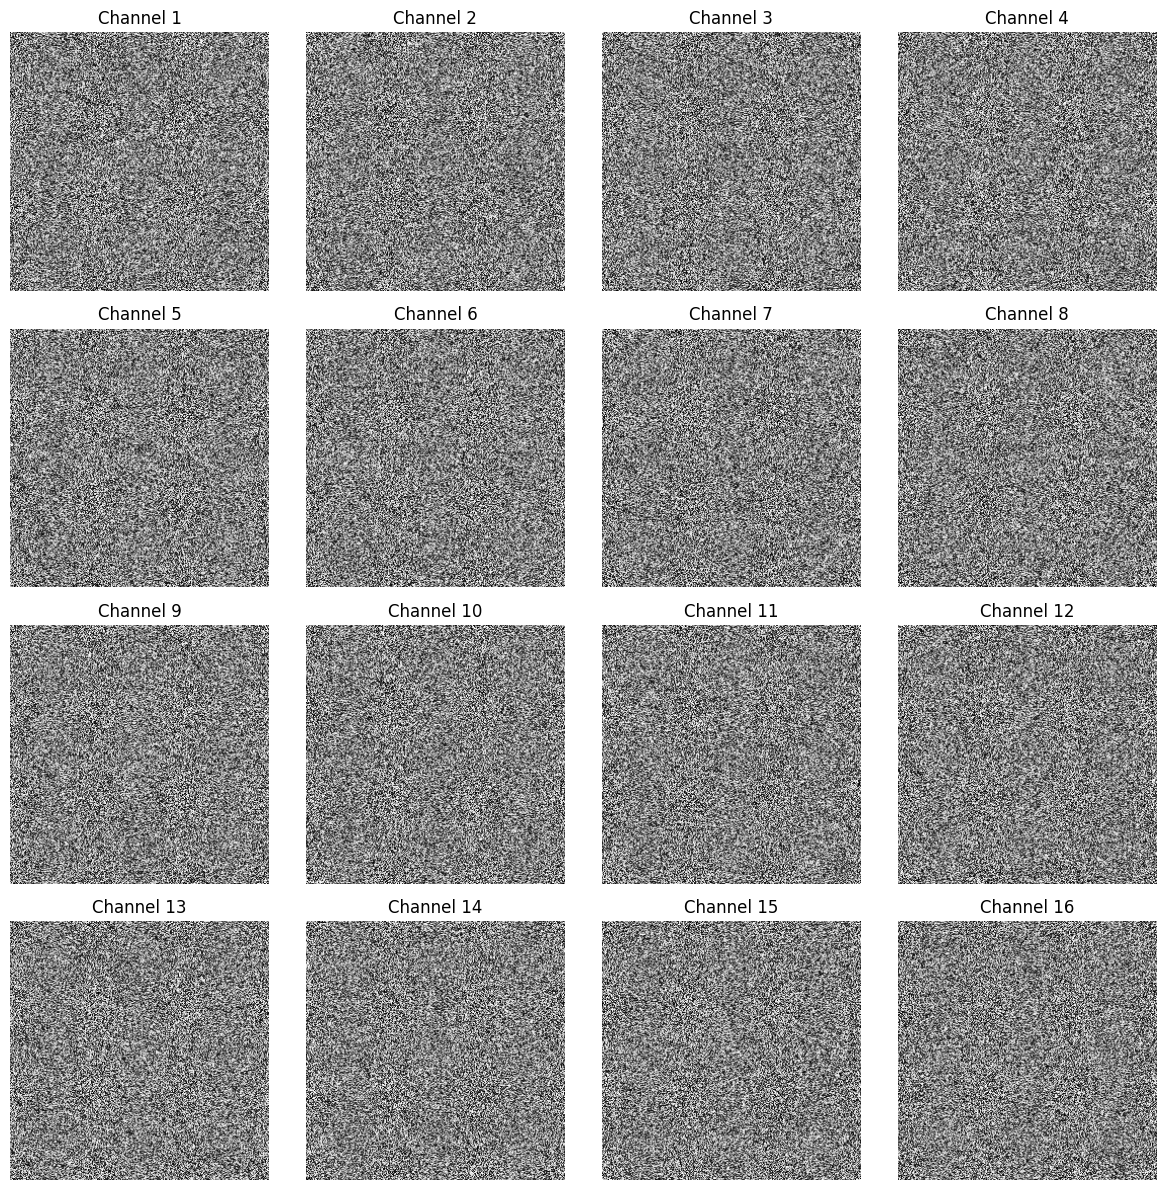

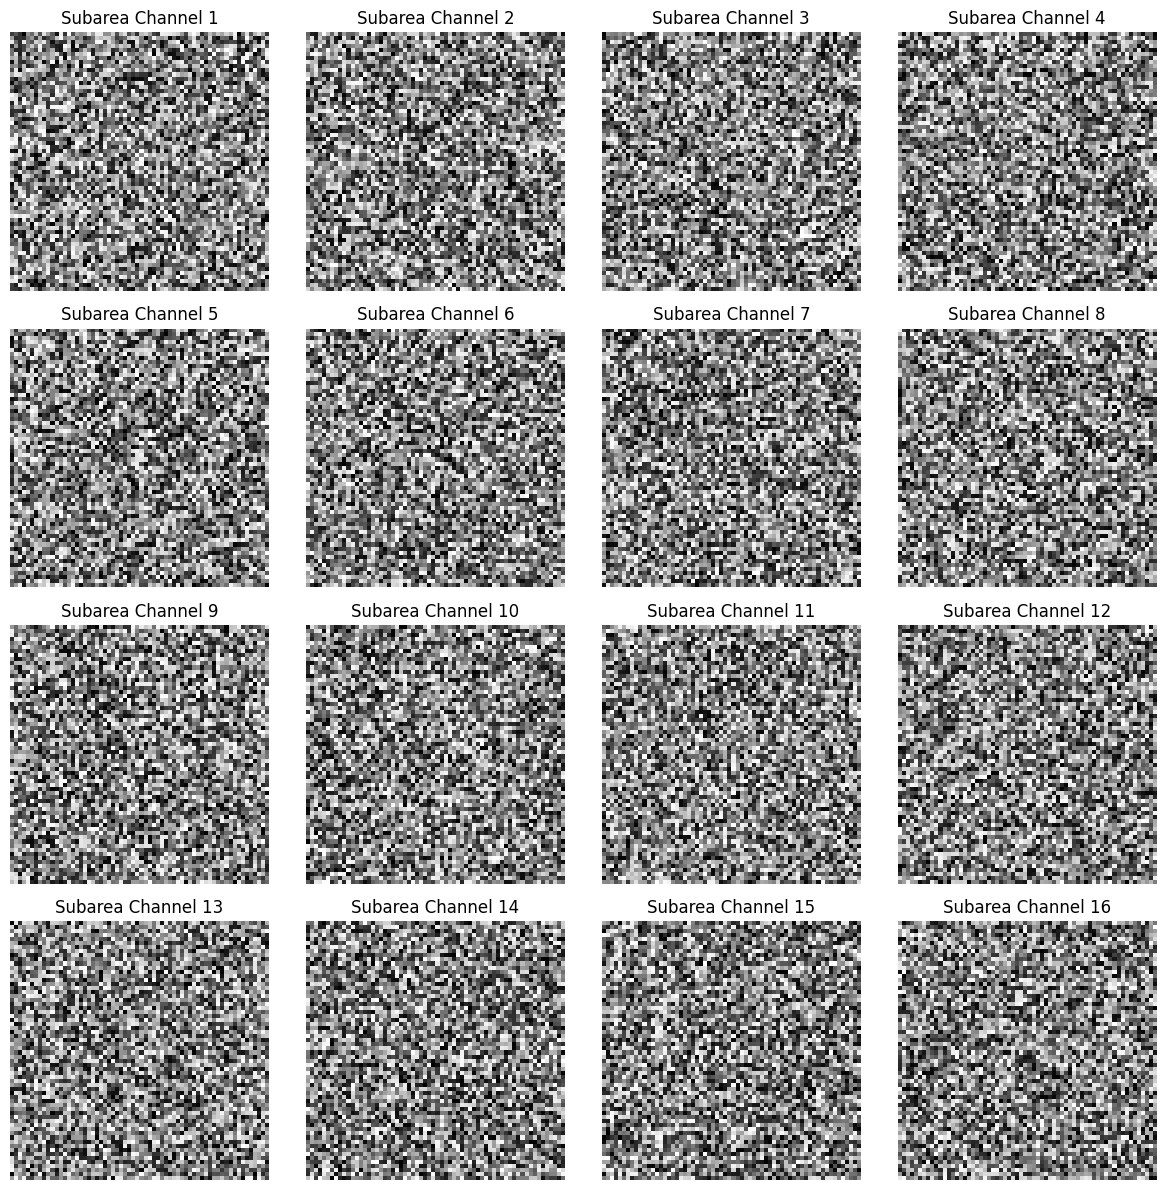

In [9]:
import numpy as np
import h5py
import random
import matplotlib.pyplot as plt

# Create a 16-channel image of size 256x256
image_size = (256, 256)
channels = 16
multi_channel_image = np.random.rand(channels, image_size[0], image_size[1])

# Save the 16-channel image in HDF5 format
with h5py.File('16_channel_image.h5', 'w') as hf:
    hf.create_dataset('image', data=multi_channel_image)

# Function to visualize the 16-channel image
def visualize_16_channel_image(image):
    channels, height, width = image.shape
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))  # 4x4 grid for 16 channels

    for i in range(channels):
        ax = axes[i // 4, i % 4]  # Determine position in the 4x4 grid
        ax.imshow(image[i], cmap='gray')  # Display each channel as a grayscale image
        ax.set_title(f'Channel {i+1}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Function to extract random subareas
def extract_random_subarea(image, subarea_size=(64, 64)):
    channels, height, width = image.shape
    top_left_x = random.randint(0, width - subarea_size[1])
    top_left_y = random.randint(0, height - subarea_size[0])
    subarea = image[:, top_left_y:top_left_y+subarea_size[0], top_left_x:top_left_x+subarea_size[1]]
    return subarea

# Function to visualize a 16-channel subarea
def visualize_subarea(subarea):
    channels, height, width = subarea.shape
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))  # 4x4 grid for 16 channels

    for i in range(channels):
        ax = axes[i // 4, i % 4]
        ax.imshow(subarea[i], cmap='gray')  # Display each channel as a grayscale image
        ax.set_title(f'Subarea Channel {i+1}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Load and visualize the 16-channel image
with h5py.File('16_channel_image.h5', 'r') as hf:
    multi_channel_image = hf['image'][:]

visualize_16_channel_image(multi_channel_image)

# Extract a random subarea and visualize it
subarea = extract_random_subarea(multi_channel_image, (64, 64))
visualize_subarea(subarea)


# Generates a 16 channel image that has distinct colors in each quadrant and then generates an subarea of the top left quadrant. This is to make sure random works properly

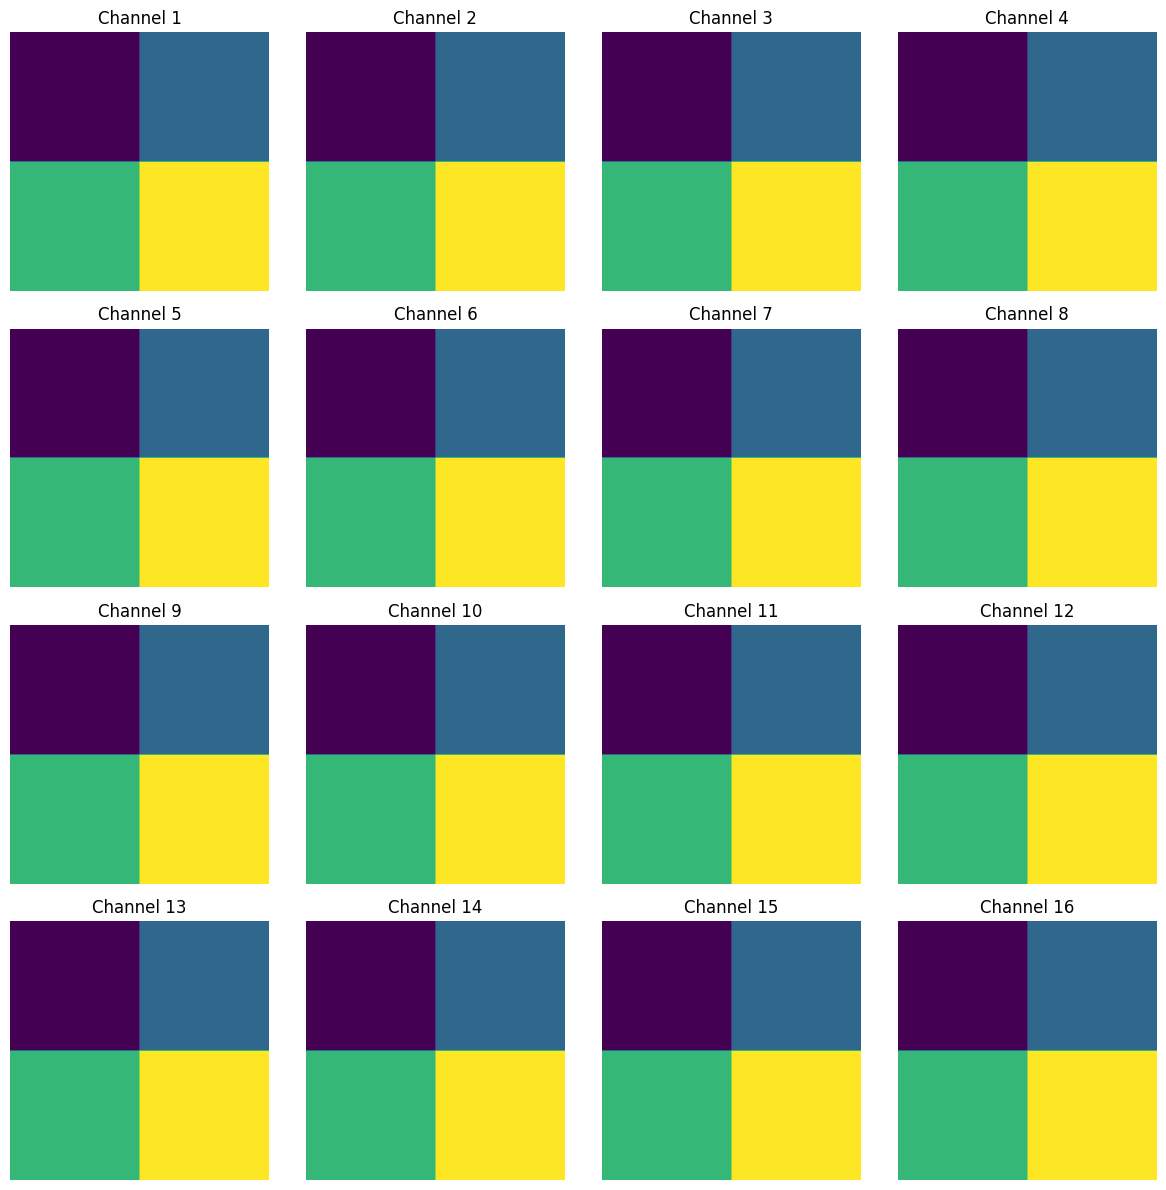

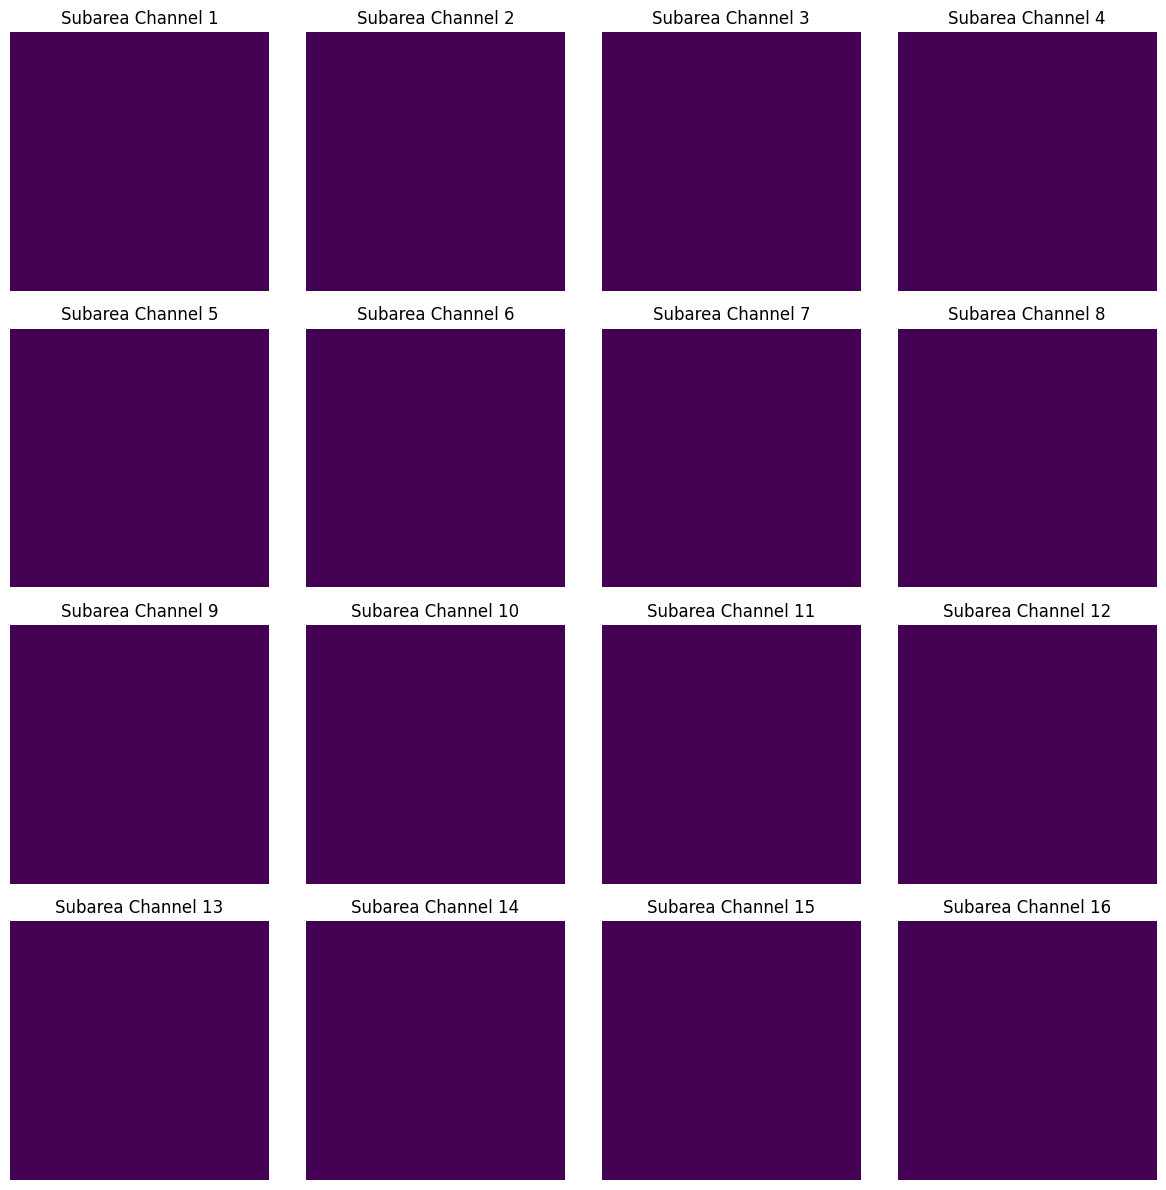

In [10]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# Create a 16-channel image with distinct values for each quadrant
def create_quadrant_image(channels, size):
    image = np.zeros((channels, size[0], size[1]))

    half_h = size[0] // 2
    half_w = size[1] // 2

    for i in range(channels):
        # Top-left quadrant
        image[i, :half_h, :half_w] = i + 1  # Channel value for top-left
        # Top-right quadrant
        image[i, :half_h, half_w:] = (i + 1) * 2  # Channel value for top-right
        # Bottom-left quadrant
        image[i, half_h:, :half_w] = (i + 1) * 3  # Channel value for bottom-left
        # Bottom-right quadrant
        image[i, half_h:, half_w:] = (i + 1) * 4  # Channel value for bottom-right

    return image

# Function to visualize the 16-channel image
def visualize_16_channel_image(image):
    channels, height, width = image.shape
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))  # 4x4 grid for 16 channels

    for i in range(channels):
        ax = axes[i // 4, i % 4]  # Determine position in the 4x4 grid
        ax.imshow(image[i], cmap='viridis')  # Display each channel with a colormap
        ax.set_title(f'Channel {i+1}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Function to extract the top-left quarter
def extract_top_left_subarea(image):
    channels, height, width = image.shape
    half_h = height // 2
    half_w = width // 2

    # Extract the top-left quarter
    subarea = image[:, :half_h, :half_w]
    return subarea

# Function to visualize a 16-channel subarea
def visualize_subarea(subarea):
    channels, height, width = subarea.shape
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))  # 4x4 grid for 16 channels

    for i in range(channels):
        ax = axes[i // 4, i % 4]
        ax.imshow(subarea[i], cmap='viridis')  # Display each channel with a colormap
        ax.set_title(f'Subarea Channel {i+1}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Create the image with distinct quadrants
image_size = (256, 256)
channels = 16
multi_channel_image = create_quadrant_image(channels, image_size)

# Visualize the 16-channel image with distinct quadrant colors
visualize_16_channel_image(multi_channel_image)

# Extract the top-left subarea
subarea = extract_top_left_subarea(multi_channel_image)

# Visualize the top-left subarea
visualize_subarea(subarea)


# Adding functionality
- Must be able to generate X images
- From those X images, must be able to generate Y subareas of shape (h,w,original_channles)
- Save the randomly generated subareas as new images
- Keep track of which subarea came from which image


In [12]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os


# Function to create a 16-channel image with distinct values for each quadrant
def create_quadrant_image(channels, size):
    image = np.zeros((channels, size[0], size[1]))

    half_h = size[0] // 2
    half_w = size[1] // 2

    for i in range(channels):
        # Top-left quadrant
        image[i, :half_h, :half_w] = i + 1  # Channel value for top-left
        # Top-right quadrant
        image[i, :half_h, half_w:] = (i + 1) * 2  # Channel value for top-right
        # Bottom-left quadrant
        image[i, half_h:, :half_w] = (i + 1) * 3  # Channel value for bottom-left
        # Bottom-right quadrant
        image[i, half_h:, half_w:] = (i + 1) * 4  # Channel value for bottom-right

    return image

# Function to extract the top-left quarter
def extract_top_left_subarea(image):
    channels, height, width = image.shape
    half_h = height // 2
    half_w = width // 2

    # Extract the top-left quarter
    subarea = image[:, :half_h, :half_w]
    return subarea

# Function to visualize a 16-channel image (optional for debugging)
def visualize_16_channel_image(image):
    channels, height, width = image.shape
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))  # 4x4 grid for 16 channels

    for i in range(channels):
        ax = axes[i // 4, i % 4]  # Determine position in the 4x4 grid
        ax.imshow(image[i], cmap='viridis')  # Display each channel with a colormap
        ax.set_title(f'Channel {i+1}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Function to save subarea as a new image
def save_subarea(subarea, filename):
    # Save the subarea in HDF5 format (you can adjust the format as needed)
    with h5py.File(filename, 'w') as hf:
        hf.create_dataset('subarea', data=subarea)
    print(f"Saved subarea as {filename}")

# Function to create and save multiple images with subareas
def generate_images_with_subareas(num_images, subareas_per_image, image_size=(256, 256), channels=16):
    log = []  # List to keep track of which original image each subarea came from

    for img_index in range(num_images):
        # Create a new 16-channel image
        original_image = create_quadrant_image(channels, image_size)
        original_filename = f'original_image_{img_index+1}.h5'

        # Save the original image
        with h5py.File(original_filename, 'w') as hf:
            hf.create_dataset('image', data=original_image)

        print(f"Created original image: {original_filename}")

        # Generate subareas
        for subarea_index in range(subareas_per_image):
            # Extract the top-left subarea (you can change this to another method if needed)
            subarea = extract_top_left_subarea(original_image)

            # Save the subarea
            subarea_filename = f'{output_dir}/subarea_{img_index+1}_{subarea_index+1}.h5'
            save_subarea(subarea, subarea_filename)

            # Log which image the subarea came from
            log.append({
                'subarea_filename': subarea_filename,
                'original_image_filename': original_filename
            })

    return log

# Function to print the log showing subareas and their original images
def print_log(log):
    print("\nSubareas and their original images:")
    for entry in log:
        print(f"Subarea: {entry['subarea_filename']} came from: {entry['original_image_filename']}")


In [13]:
# Create a directory to store subarea images
output_dir = 'subarea_images'
os.makedirs(output_dir, exist_ok=True)

# Example: Generate 3 images, each with 5 subareas
log = generate_images_with_subareas(num_images=3, subareas_per_image=5)

# Print the log to track the subareas
print_log(log)

Created original image: original_image_1.h5
Saved subarea as subarea_images/subarea_1_1.h5
Saved subarea as subarea_images/subarea_1_2.h5
Saved subarea as subarea_images/subarea_1_3.h5
Saved subarea as subarea_images/subarea_1_4.h5
Saved subarea as subarea_images/subarea_1_5.h5
Created original image: original_image_2.h5
Saved subarea as subarea_images/subarea_2_1.h5
Saved subarea as subarea_images/subarea_2_2.h5
Saved subarea as subarea_images/subarea_2_3.h5
Saved subarea as subarea_images/subarea_2_4.h5
Saved subarea as subarea_images/subarea_2_5.h5
Created original image: original_image_3.h5
Saved subarea as subarea_images/subarea_3_1.h5
Saved subarea as subarea_images/subarea_3_2.h5
Saved subarea as subarea_images/subarea_3_3.h5
Saved subarea as subarea_images/subarea_3_4.h5
Saved subarea as subarea_images/subarea_3_5.h5

Subareas and their original images:
Subarea: subarea_images/subarea_1_1.h5 came from: original_image_1.h5
Subarea: subarea_images/subarea_1_2.h5 came from: origin